<a href="https://colab.research.google.com/github/cindylozano/DataScienceTLG/blob/Redes/SC66_Reto_LOZANOLOPEZ_CINDYLISSETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto | Análisis de empleados en una red de correo electrónico 👩🏽‍💻📧🌐

### Introducción
Actualmente es importante conocer cuáles son las estructuras sociales más propicias para transferir conocimientos y mejorar el desempeño laboral en redes de comunicación. Antes se analizaban redes de comunicación cara a cara, pero hoy en día, con el crecimiento del trabajo desde casa, esta comunicación ha sido sustituida por el correo electrónico.

Hay que tener en cuenta las diferencias en estos dos tipos de redes. En las redes cara a cara, se puede relacionar la interacción entre las personas con una mayor productividad de los trabajadores, mientras que en la comunicación por correo electrónico ocurre lo contrario. En una red de comunicación de correo electrónico que una persona dedique tanto tiempo a escribir correos evita que se enfoque en lo que es su trabajo.

Trabajaremos con la base de datos de la empresa Enron Corporation que fue una empresa energética estadounidense de servicios, que dejó de operar en 2007:

* Esta base de datos consta de vínculos entre 143 empleados que enviaron correos electrónicos entre sí dentro del sistema.
* El conjunto de datos tiene un total de 623 enlaces de correo electrónico.

Queremos que uses el análisis de redes sociales para entender cuáles son los nodos clave de la red, como es la distribución y comportamiento de la red. Los datos los encontraras en el archivo ‘email-enron-only.mtx’. El cual contiene dos columnas, el que envía el correo y quien lo recibe.

### Objetivo
El objetivo de este reto es poner en práctica los contenidos revisados durante el módulo realizando los siguientes pasos:
* Construir una red a partir de una base de datos y lograr una visualización adecuada de la red.
* Análisis de distancias en la red.
* Análisis de resiliencia.
* Análisis de centralidades.

### Pasos a realizar
* Descarga el archivo email-enron-only.mtx, que te dejamos al final de este recurso.
* Abre los archivos descargados para conocer su estructura y familiarizarte con la información contenida en ellos
* Genera una libreta en Google Colab para resolver el reto con scripts de Python.
* Crea un dataframe en pandas para el archivo.
* Construye una red no dirigida a partir de dataframe. Utiliza NetworkX para tener una visualización adecuada de la red, puedes manipular el color y tamaño de nodos y arcos.
* Con base a lo anterior responderás una serie de preguntas.

### Paso 1: Construcción de una red
Construye una red no dirigida a partir de dataframe. Utiliza NetworkX para tener una visualización adecuada de la red, puedes manipular el color y tamaño de nodos y arcos.

In [32]:
# Importar las librerías
import pandas as pd
import networkx as nx
import requests
from io import StringIO
import matplotlib.pyplot as plt
import networkx.algorithms.connectivity as nxcon

In [6]:
# URL del archivo MTX en GitHub
url = "https://raw.githubusercontent.com/cindylozano/DataScienceTLG/refs/heads/Redes/email-enron-only.mtx"

# Leer el archivo y convertirlo en DataFrame
response = requests.get(url)
data = response.text
df_emails = pd.read_csv(StringIO(data), sep=" ", header=None, names=["From", "To"])

df_emails.head()

,From,To
0,17,1
1,72,1
2,3,2
3,19,2
4,20,2


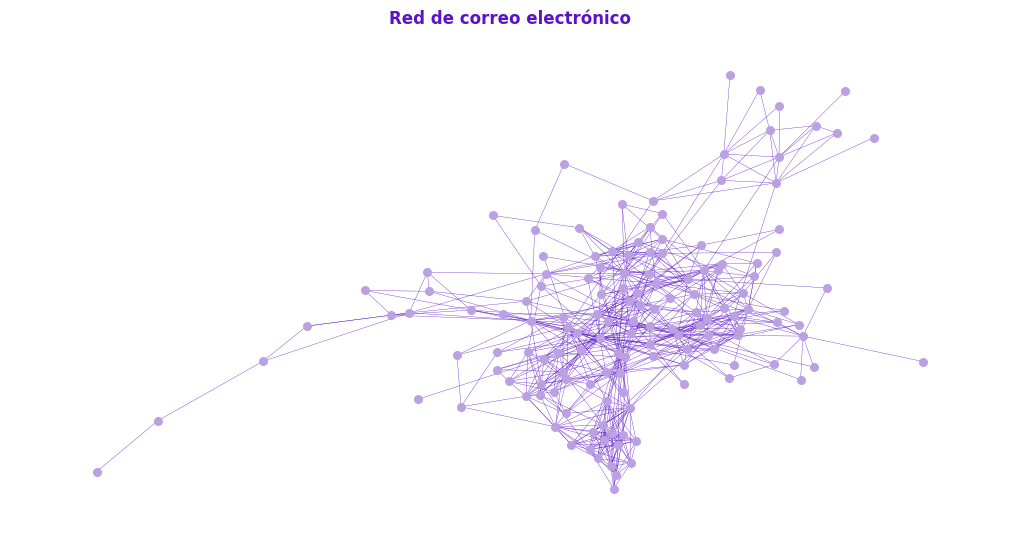

In [18]:
# Crear el grafo no dirigido a partir del DataFrame
G_emails = nx.from_pandas_edgelist(df_emails, source="From", target="To", create_using=nx.Graph())

# Visualizar el grafo
plt.figure(figsize=(10,5))
pos = nx.spring_layout(G_emails)
options = {
    "node_color": "#bba0e2",
    "node_size": 30,
    "edge_color": "#5c13c5",
    "width": 0.25,
    "with_labels": False
}
nx.draw(G_emails, pos, **options)
plt.title("Red de correo electrónico", fontweight= "bold", color="#5c13c5")
plt.show()

In [29]:
# Obtener el grado máximo y mínimo en la red
max_degree = max(dict(G_emails.degree).values())
min_degree = min(dict(G_emails.degree).values())

# Nodo con el grado máximo
max_degree_nodes = [node for node, degree in G_emails.degree if degree == max_degree]
print("Nodo con el grado máximo:", max_degree_nodes)

# Nodo con el grado mínimo
min_degree_nodes = [node for node, degree in G_emails.degree if degree == min_degree]
print("Nodo con el grado mínimo:", min_degree_nodes)

# Diámetro de la red
diameter = nx.diameter(G_emails)
print("Diámetro de la red:", diameter)

# Distancia promedio más corta
average_shortest_path_length = nx.average_shortest_path_length(G_emails)
print("Distancia promedio más corta:", average_shortest_path_length)

# Es bipartita
is_bipartite = nx.is_bipartite(G_emails)
print("Es bipartita:", is_bipartite)

Nodo con el grado máximo: [105]
Nodo con el grado mínimo: [15, 42, 63, 80, 92, 98]
Diámetro de la red: 8
Distancia promedio más corta: 2.967004826159756
Es bipartita: False


### Paso 2: Identificación de la red
La red que estas analizando es conexa.  Un grafo conexo puede dividirse en un grafo disconexo al remover ciertos nodos o arcos o ambos. La habilidad de la red para funcionar incluso después de remover nodos o arcos se llama robustez o resiliencia.

In [30]:
# Calcular densidad de la red
density = nx.density(G_emails)
print("Densidad de la red:", density)

Densidad de la red: 0.061361174037230376


In [33]:
# Calcular cantidad de nodos
num_nodes = G_emails.number_of_nodes()
print("Cantidad de nodos:", num_nodes)

# Calcular cantidad de arcos
num_edges = G_emails.number_of_edges()
print("Cantidad de arcos:", num_edges)

Cantidad de nodos: 143
Cantidad de arcos: 623


In [37]:
# Calcular promedio de la conectividad de todos los nodos
avg_nodes_con = nx.average_node_connectivity(G_emails)
print("Promedio de la conectividad de todos los nodos:", avg_nodes_con)

Promedio de la conectividad de todos los nodos: 4.951344430217669


In [34]:
# Nodos que hay que remover para que la red sea disconexa (cortes mínimos)
min_nodes_cut = nxcon.minimum_node_cut(G_emails)
print("Nodos mínimos a remover:", min_nodes_cut)

# Arcos que hay que remover para que la red sea disconexa (cortes mínimos)
min_edges_cut = nxcon.minimum_edge_cut(G_emails)
print("Arcos mínimos a remover:", min_edges_cut)

# Cantidad de nodos necesarios para que la red pierda conectividad
con_lose = nxcon.node_connectivity(G_emails)
print("Cantidad de nodos necesarios para que la red pierda conectividad:", con_lose)

Nodos mínimos a remover: {85}
Arcos mínimos a remover: {(130, 98)}
Cantidad de nodos necesarios para que la red pierda conectividad: 1


Una vez encontrados los nodos y arcos del paso anterior, identifícalos con un color diferente en la visualización de la red.

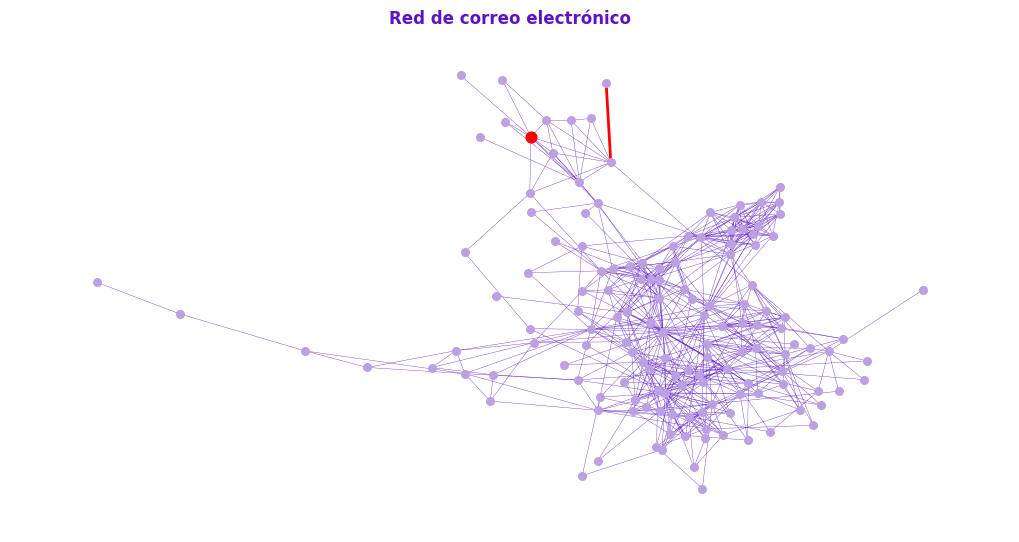

In [45]:
# Visualizar el grafo
plt.figure(figsize=(10,5))
pos = nx.spring_layout(G_emails)
options = {
    "node_color": "#bba0e2",
    "node_size": 30,
    "edge_color": "#5c13c5",
    "width": 0.25,
    "with_labels": False
}
nx.draw(G_emails, pos, **options)

# Identificar los nodos mínimos a remover en rojo
nx.draw_networkx_nodes(G_emails, pos, nodelist=min_nodes_cut, node_color="red", node_size=60)

# Identificar los arcos mínimos a remover en rojo
nx.draw_networkx_edges(G_emails, pos, edgelist=min_edges_cut, edge_color="red", width=2.0)

plt.title("Red de correo electrónico", fontweight= "bold", color="#5c13c5")
plt.show()

### Paso 3: Calcula y visualiza las centralidades de la red
Las centralidades miden la importancia de los nodos basados en diferentes criterios. Con base en diferentes definiciones de importancia de un nodo, calcula la centralidad de grado, de intermediación y de cercanía. Muestra con un color diferente en la red a los 10 nodos más importantes para cada centralidad.

In [56]:
# Función para visualizar la red remarcando los nodos más importantes
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(10, 5))

    # Identificar los 10 nodos principales según las medidas
    top_nodes = sorted(measures.items(), key=lambda x: x[1], reverse=True)[:10]
    top_node_ids = [node for node, _ in top_nodes]

    # Trazar nodos normales
    normal_nodes = [node for node in G.nodes if node not in top_node_ids]
    nx.draw_networkx_nodes(
        G, pos, node_size=30, node_color="#bba0e2",
        nodelist=normal_nodes, alpha=0.8
    )

    # Trazar nodos principales
    nx.draw_networkx_nodes(
        G, pos, node_size=120, node_color="red",
        nodelist=top_node_ids, alpha=1.0
    )

    # Trazar arcos
    nx.draw_networkx_edges(G, pos, edge_color="#5c13c5", width=0.25, alpha=0.8)

    # Trazar las etiquetas de los nodos principales
    nx.draw_networkx_labels(G, pos, labels={node: node for node in top_node_ids}, font_color="white", font_size=8)

    plt.title(measure_name, fontweight="bold", color="#5c13c5")
    plt.axis('off')
    plt.show()

In [48]:
# Top 10 nodos más importantes - Centralidad de grado
degrees = dict(G_emails.degree())
deg_cen = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
top_10_cen = deg_cen[0:10]
top_10_cen

[(105, 42),
 (17, 30),
 (95, 23),
 (48, 20),
 (132, 19),
 (43, 19),
 (31, 18),
 (74, 18),
 (91, 18),
 (72, 17)]

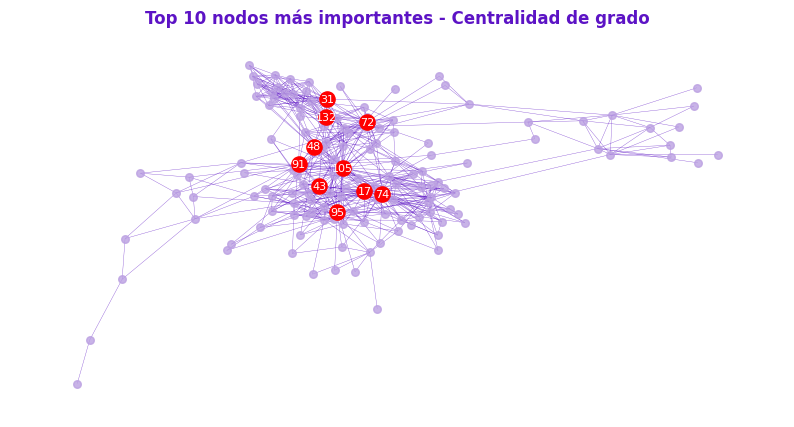

In [59]:
# Red identificando Centralidad de grado
pos = nx.spring_layout(G_emails)
measures = nx.degree_centrality(G_emails)
draw_net(G_emails, pos, measures, "Top 10 nodos más importantes - Centralidad de grado")

In [60]:
# Top 10 nodos más importantes - Intermediación
betweenness = nx.betweenness_centrality(G_emails)
betweenness_cen = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
top_10_bet_cen = betweenness_cen[0:10]
top_10_bet_cen

[(105, 0.19400604344556296),
 (17, 0.11088210445609471),
 (48, 0.09673142009207425),
 (91, 0.09118959870866389),
 (32, 0.08554735598477585),
 (95, 0.07579595400584722),
 (141, 0.06345441275176905),
 (22, 0.05846852533268458),
 (72, 0.05833907970763193),
 (51, 0.05199434696409222)]

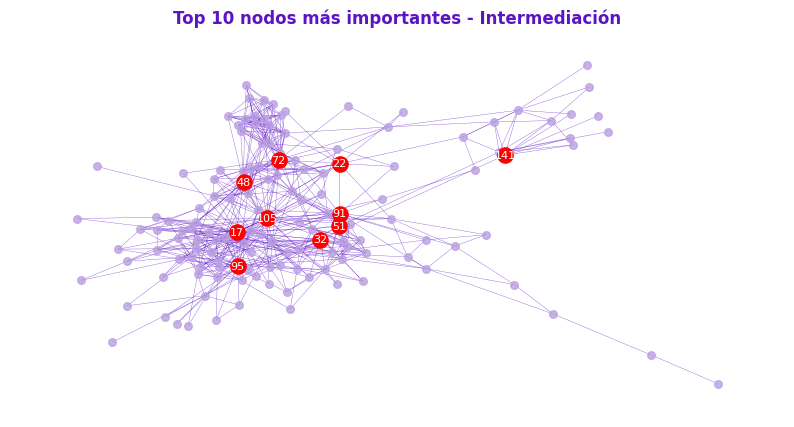

In [61]:
# Red identificando Intermediación
pos = nx.spring_layout(G_emails)
measures = betweenness
draw_net(G_emails, pos, measures, "Top 10 nodos más importantes - Intermediación")

In [62]:
# Top 10 nodos más importantes - Cercanía
closeness = nx.closeness_centrality(G_emails)
closeness_cen = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
top_10_close_cen = closeness_cen[0:10]
top_10_close_cen

[(105, 0.5),
 (17, 0.47019867549668876),
 (95, 0.4382716049382716),
 (74, 0.4369230769230769),
 (37, 0.4369230769230769),
 (48, 0.43558282208588955),
 (91, 0.43425076452599387),
 (43, 0.4316109422492401),
 (72, 0.42900302114803623),
 (22, 0.4251497005988024)]

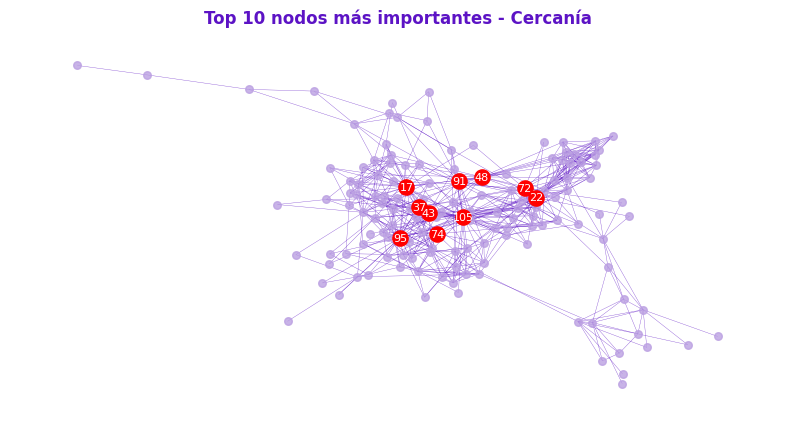

In [63]:
# Red identificando Cercanía
pos = nx.spring_layout(G_emails)
measures = closeness
draw_net(G_emails, pos, measures, "Top 10 nodos más importantes - Cercanía")

In [66]:
# Resumen de centralidad de nodos

# Listas de DataFrames por tipo de centralidad
degree_df = pd.DataFrame(top_10_cen, columns=['node', 'measure'])
degree_df['centrality_type'] = 'Degree Centrality'

betweenness_df = pd.DataFrame(top_10_bet_cen, columns=['node', 'measure'])
betweenness_df['centrality_type'] = 'Betweenness Centrality'

closeness_df = pd.DataFrame(top_10_close_cen, columns=['node', 'measure'])
closeness_df['centrality_type'] = 'Closeness Centrality'

# Concatenar los DataFrames
combined_df = pd.concat([degree_df, betweenness_df, closeness_df], ignore_index=True)

# Mostrar el DataFrame resultante
combined_df

,node,measure,centrality_type
0,105,42.000000,Degree Centrality
1,17,30.000000,Degree Centrality
2,95,23.000000,Degree Centrality
3,48,20.000000,Degree Centrality
4,132,19.000000,Degree Centrality
5,43,19.000000,Degree Centrality
6,31,18.000000,Degree Centrality
7,74,18.000000,Degree Centrality
8,91,18.000000,Degree Centrality
9,72,17.000000,Degree Centrality


In [67]:
# Crear un nuevo DataFrame con la cuenta de nodos
count_df = combined_df.groupby('node').size().reset_index(name='count')

# Ordenar el nuevo DataFrame por el conteo en orden descendente
count_df = count_df.sort_values(by='count', ascending=False)

# Mostrar el DataFrame de conteo
count_df

,node,count
0,17,3
6,48,3
8,72,3
10,91,3
11,95,3
12,105,3
1,22,2
5,43,2
9,74,2
2,31,1


### Paso 4: Crea una red dirigida
Ahora sí importa quién manda el correo y quién lo recibe. En esta nueva red calcula el PageRank de los nodos, y para visualizarlos en la red.

In [69]:
# Crear el grafo dirigido a partir del DataFrame
G_emails_directed = nx.from_pandas_edgelist(df_emails, source="From", target="To", create_using=nx.DiGraph())

# Función para visualizar la red remarcando los nodos más importantes
def draw_net_directed(G, pos, measures, measure_name):
    plt.figure(figsize=(10, 5))

    # Identificar los 10 nodos principales según las medidas
    top_nodes = sorted(measures.items(), key=lambda x: x[1], reverse=True)[:10]
    top_node_ids = [node for node, _ in top_nodes]

    # Trazar nodos normales
    normal_nodes = [node for node in G.nodes if node not in top_node_ids]
    nx.draw_networkx_nodes(
        G, pos, node_size=30, node_color="#bba0e2",
        nodelist=normal_nodes, alpha=0.8
    )

    # Trazar nodos principales
    nx.draw_networkx_nodes(
        G, pos, node_size=120, node_color="red",
        nodelist=top_node_ids, alpha=1.0
    )

    # Trazar arcos (red dirigida)
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10, edge_color="#5c13c5", width=0.25, alpha=0.8)

    # Trazar las etiquetas de los nodos principales
    nx.draw_networkx_labels(G, pos, labels={node: node for node in top_node_ids}, font_color="white", font_size=8)

    plt.title(measure_name, fontweight="bold", color="#5c13c5")
    plt.axis('off')
    plt.show()

In [70]:
# Top 10 nodos más importantes - PageRank
pagerank = nx.pagerank(G_emails_directed)
pagerank_cen = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
top_10_pagerank_cen = pagerank_cen[0:10]
top_10_pagerank_cen

[(17, 0.04868015174807312),
 (6, 0.033312856903145185),
 (7, 0.03256841781764689),
 (2, 0.028037586973468913),
 (10, 0.02572760354369403),
 (11, 0.02518693402833705),
 (3, 0.019376898242899836),
 (14, 0.019069269172817073),
 (9, 0.01762991227822369),
 (43, 0.017306804121815886)]

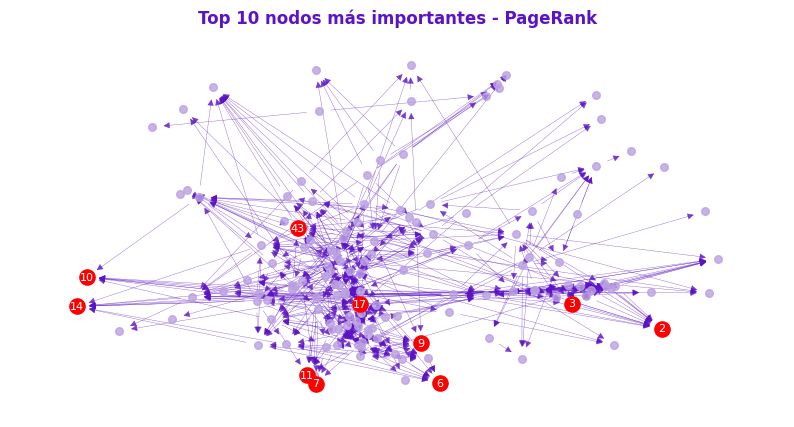

In [71]:
# Red identificando PageRank
pos = nx.spring_layout(G_emails_directed)
measures = pagerank
draw_net_directed(G_emails_directed, pos, measures, "Top 10 nodos más importantes - PageRank")

### Cálculos para conclusiones

In [72]:
# Total de empleados, total de interacciones por correo electrónico
total_employees = G_emails.number_of_nodes()
total_interactions = G_emails.number_of_edges()

print("Total de empleados:", total_employees)
print("Total de interacciones por correo electrónico:", total_interactions)

Total de empleados: 143
Total de interacciones por correo electrónico: 623


In [73]:
# Obtener el grado máximo y mínimo en la red
max_degree = max(dict(G_emails.degree).values())
min_degree = min(dict(G_emails.degree).values())

# Nodo con el grado máximo
max_degree_nodes = [node for node, degree in G_emails.degree if degree == max_degree]
print("Nodo con el grado máximo:", max_degree_nodes)

# Nodo con el grado mínimo
min_degree_nodes = [node for node, degree in G_emails.degree if degree == min_degree]
print("Nodo con el grado mínimo:", min_degree_nodes)

Nodo con el grado máximo: [105]
Nodo con el grado mínimo: [15, 42, 63, 80, 92, 98]


In [74]:
# Diámetro de la red
diameter = nx.diameter(G_emails)
print("Diámetro de la red:", diameter)

Diámetro de la red: 8


In [75]:
# Distancia promedio más corta
average_shortest_path_length = nx.average_shortest_path_length(G_emails)
print("Distancia promedio más corta:", average_shortest_path_length)

Distancia promedio más corta: 2.967004826159756


In [76]:
# Nodo más importante - PageRank
pagerank = nx.pagerank(G_emails_directed)
pagerank_cen = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
top_1_pagerank_cen = pagerank_cen[0:1]
top_1_pagerank_cen

[(17, 0.04868015174807312)]

### Referencias
* Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008